In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
    
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [5]:
data = pd.read_csv(r"C:\Users\Admin\Desktop\PROJECT\churn_data.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
data.shape


(7043, 21)

In [8]:
data.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
#As we can see from the data, the variable 'TotalChares' is numerical but when we are reading it using pandas
#it is of type object so convert it back to numerical.

In [10]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [11]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Univariate Analysis
#Univariate analysis is the simplest form of analyzing data.
#“Uni” means “one”, so in other words your data has only one variable.
#It doesn’t deal with causes or relationships (unlike regression) and 
#it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data. source here


### categorical variables

In [12]:
categorical_var = list(data.dtypes.loc[data.dtypes == 'object'].index)
print(len(categorical_var))
print(categorical_var)

17
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [13]:
categorical_var.remove('customerID')

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


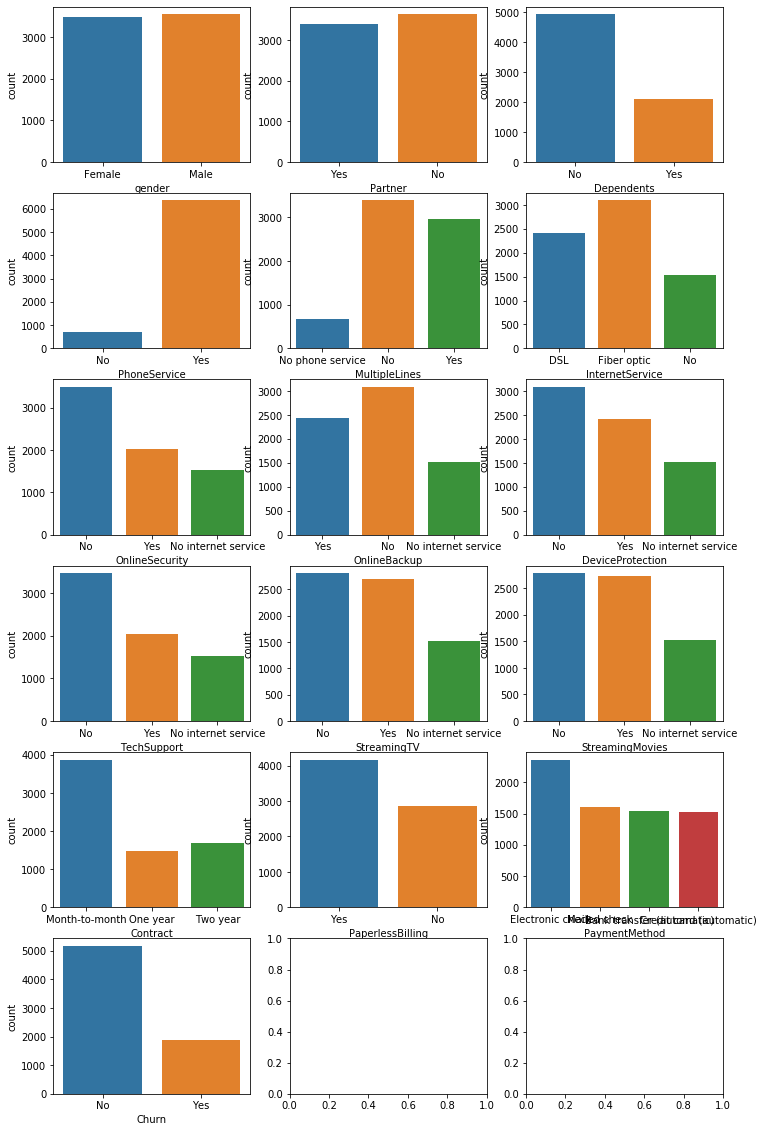

In [14]:
fig, ax =plt.subplots(6,3,figsize=(12,20))


sns.countplot(data['gender'], ax=ax[0][0])
sns.countplot(data['Partner'], ax=ax[0][1])
sns.countplot(data['Dependents'], ax=ax[0][2])

sns.countplot(data['PhoneService'], ax=ax[1][0])
sns.countplot(data['MultipleLines'], ax=ax[1][1])
sns.countplot(data['InternetService'], ax=ax[1][2])

sns.countplot(data['OnlineSecurity'], ax=ax[2][0])
sns.countplot(data['OnlineBackup'], ax=ax[2][1])
sns.countplot(data['DeviceProtection'], ax=ax[2][2])

sns.countplot(data['TechSupport'], ax=ax[3][0])
sns.countplot(data['StreamingTV'], ax=ax[3][1])
sns.countplot(data['StreamingMovies'], ax=ax[3][2])

sns.countplot(data['Contract'], ax=ax[4][0])
sns.countplot(data['PaperlessBilling'], ax=ax[4][1])
sns.countplot(data['PaymentMethod'], ax=ax[4][2])

sns.countplot(data['Churn'], ax=ax[5][0])

fig.show()

### Continuous Variables
#SeniorCitizen
#tenure
#MonthlyCharges
#TotalCharges

In [15]:
continuous_var = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
#Finally, to get a quick glimpse of all continuous variables in a data set, 
#let's plot histograms for all numeric variables to determine if all variables are skewed.

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

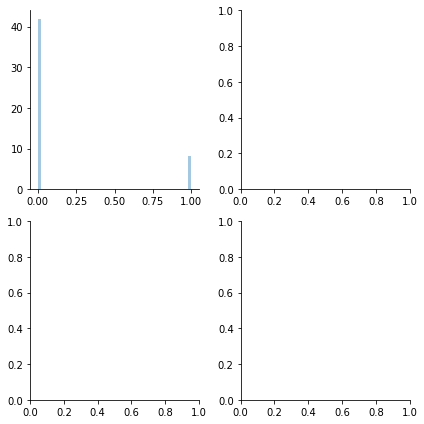

In [17]:
nd = pd.melt(data, value_vars = continuous_var)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=2, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### Bivariate Analysis
#Bivariate analysis deals with the analysis of two variables, 
#to find the relationship between them. There are three cases which we will discuss here.


### Continuous -Continuous Variables :
#1. Scatter plots
#2. Correlation

### Categorical-Continuous Variables:
1. z-test/t-test
2. ANOVA test

###1. Continuous-Continuous Variables

In [ ]:
corr = data[continuous_var].corr()
sns.heatmap(corr)

In [ ]:
print (corr['TotalCharges'].sort_values(ascending=False), '\n') 

### We can say that the variable TotalCharges and tenure are highly positive correlated.

In [ ]:
sns.jointplot(x=data['TotalCharges'], y=data['tenure'])

 2. Categorical-Categorical Vairables

In [ ]:
for var in categorical_var:
    if var!='Churn':
        test = data.groupby([var,'Churn'])
        print(test.size(),'\n\n')

### Chi Square test

In [18]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

df = data
#Initialize ChiSquare Class
cT = ChiSquare(df)

#Feature Selection
for var in categorical_var:
    cT.TestIndependence(colX=var,colY="Churn" )

gender is NOT an important predictor. (Discard gender from model)
Partner is IMPORTANT for Prediction
Dependents is IMPORTANT for Prediction
PhoneService is NOT an important predictor. (Discard PhoneService from model)
MultipleLines is IMPORTANT for Prediction
InternetService is IMPORTANT for Prediction
OnlineSecurity is IMPORTANT for Prediction
OnlineBackup is IMPORTANT for Prediction
DeviceProtection is IMPORTANT for Prediction
TechSupport is IMPORTANT for Prediction
StreamingTV is IMPORTANT for Prediction
StreamingMovies is IMPORTANT for Prediction
Contract is IMPORTANT for Prediction
PaperlessBilling is IMPORTANT for Prediction
PaymentMethod is IMPORTANT for Prediction
Churn is IMPORTANT for Prediction


3. Categorical-Continuous Variables


ANOVA Test


In [22]:

import scipy.stats as stats
    
for var in continuous_var:    
    result = stats.f_oneway(data[var][data['Churn'] == 'Yes'], 
                            data[var][data['Churn'] == 'No'])
    print(var)
    print(result)

SeniorCitizen
F_onewayResult(statistic=164.04142445613567, pvalue=3.839860055795412e-37)
tenure
F_onewayResult(statistic=997.2680104991438, pvalue=7.999057960610892e-205)
MonthlyCharges
F_onewayResult(statistic=273.4637042077133, pvalue=2.7066456068950115e-60)
TotalCharges
F_onewayResult(statistic=nan, pvalue=nan)


t-test/z-test

In [24]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import ttest_ind

t_stat = []
for var in continuous_var:
    var_no_churn = data[var][data["Churn"] == "No"]
    var_yes_churn = data[var][data["Churn"] == "Yes"]
    t_value = ttest_ind(var_no_churn, var_yes_churn, equal_var=False)
    print(var)
    print(t_value)
    t_stat.append(t_value)

SeniorCitizen
Ttest_indResult(statistic=-11.343877067371809, pvalue=3.587587201830332e-29)
tenure
Ttest_indResult(statistic=34.82381869631297, pvalue=1.1954945472607148e-232)
MonthlyCharges
Ttest_indResult(statistic=-18.407526676414673, pvalue=8.592449331547539e-73)
TotalCharges
Ttest_indResult(statistic=nan, pvalue=nan)


Missing Value treatment

In [47]:
data.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [25]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)
print(data['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


### Feature selection / extraction
There are three ways for performing the feature seletion:

Filter based method, 
Wrapper based methods, 
Embedded methods
1. Filter based methods
Statistical tests can be used to select those features that have the strongest relationship with the output variable. Here we can select the features based on the output of the statistical test. Different statistical which can be use for feature selection are:1.chi-square test
2.z/t test
3.ANOVA

2. Filter based methods
Forward selection
Backward elimination
Recursive Feature elimination
3. Embedded methods
LASSO
Elastic net
Ridge regression
Now we will now encode all the categorical variables into numeric values as some of the ML algorithms will not work direclty with the categorical variables.LabelEncoder function from sklearn is used to encode variables.

In [49]:
categorical_var


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

### Convert all the categorical variables to numerical form using labelencoder



In [33]:
#first convert all the string columns to categorical form
for var in categorical_var:
    data[var] = data[var].astype('category')

In [34]:
data[categorical_var] = data[categorical_var].apply(lambda x: x.cat.codes)


In [35]:
target = data['Churn']
data=data.drop('customerID',axis=1)
all_columns = list(data.columns)
all_columns.remove('Churn')

KeyError: "['customerID'] not found in axis"

In [37]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

x = data[all_columns] # Features
y = data['Churn'] # Target variable

# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit(x, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 8
Selected Features: [False  True False  True False  True False False  True  True False  True
 False False  True  True False False False]
Feature Ranking: [ 9  1  8  1  3  1  2  6  1  1  4  1 11 10  1  1  5  7 12]


In [38]:
selected_features_rfe = list(fit.support_)


### Model buidling


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

final_features_rfe = []    
for status, var in zip(selected_features_rfe, all_columns):
    if status == True:
        final_features_rfe.append(var)
        
final_features_rfe

['SeniorCitizen',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'Contract',
 'PaperlessBilling']

In [41]:
X_rfe_lr = data[final_features_rfe]
y = data['Churn']

X_train_rfe_lr,X_test_rfe_lr,y_train_rfe_lr,y_test_rfe_lr=train_test_split(X_rfe_lr,y,test_size=0.25,random_state=0)

lr_model = LogisticRegression()

# fit the model with data
lr_model.fit(X_train_rfe_lr,y_train_rfe_lr)
y_pred_rfe_lr=lr_model.predict(X_test_rfe_lr)

acc_rfe_lr = metrics.accuracy_score(y_test_rfe_lr, y_pred_rfe_lr)
print("Accuracy: ",acc_rfe_lr)

Accuracy:  0.7677455990914254


### Logistic regression


In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
# instantiate the model (using the default parameters)
lr_model_single = LogisticRegression()

# fit the model with data
lr_model_single.fit(X_train,y_train)
y_pred=lr_model_single.predict(X_test)

lr_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ",lr_acc)

Accuracy:  0.7961385576377058


### Performance Measures¶


In [43]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1151,  147],
       [ 212,  251]], dtype=int64)

In [45]:
from sklearn.metrics import roc_curve, auc
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_pred_rfe_lr)
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_pred)
roc_auc_1 = auc(fpr_1, tpr_1)
roc_auc_2 = auc(fpr_2, tpr_2)

Text(0.5, 0, 'False Positive Rate')

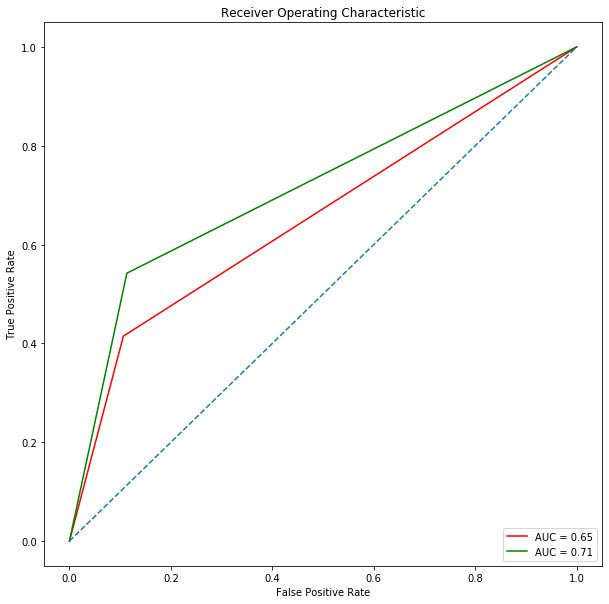

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_1,tpr_1, color='red',label = 'AUC = %0.2f' % roc_auc_1)
plt.plot(fpr_2,tpr_2, color='green',label = 'AUC = %0.2f' % roc_auc_2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')